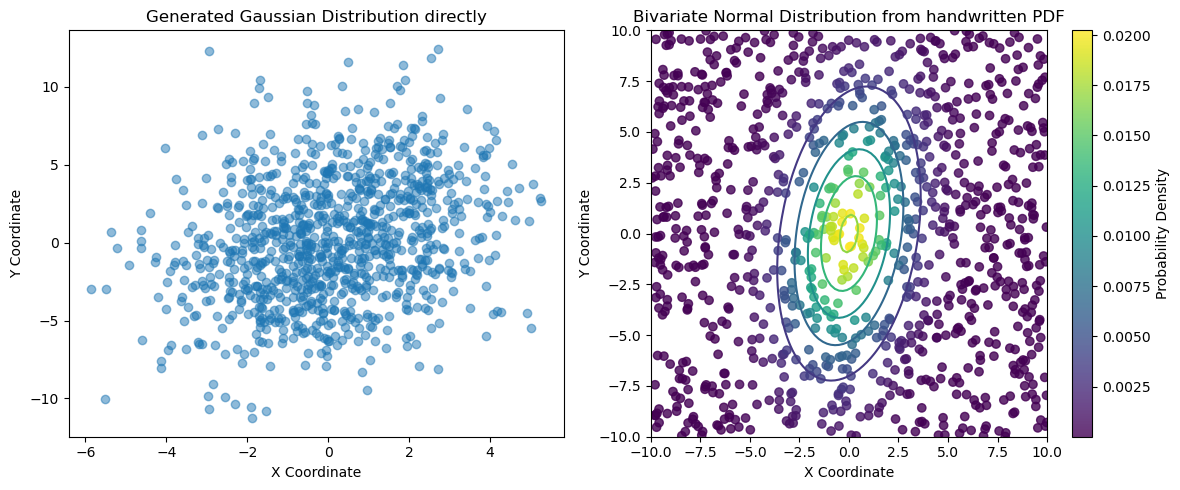

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# mean and covariant matrix

mu = [0,0]
sig = [[4,2], [2,16]]

# function for 2d gaussian pdf

def pdf(x,y,mean,cov):
    
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    exponent = -0.5 * (x**2 * inv_cov[0, 0] + y**2 * inv_cov[1, 1] + 2 * x * y * inv_cov[0, 1])
    prefactor = 1 / (2 * np.pi * np.sqrt(det_cov))
    
    return prefactor * np.exp(exponent)

# generate 1000 events
N =1000

# generate coordinates for direct way
evt = np.random.multivariate_normal(mu, sig, N) #uses the pdf inherently
x_sc = evt[:,0]
y_sc = evt[:,1]

# generate coordinates for pdf function
x_pdf = np.random.uniform(-10, 10, N)
y_pdf = np.random.uniform(-10, 10, N)

# for constant PDF contour
x_con = np.linspace(-10, 10, 100)
y_con = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_con, y_con)
PDF_values = pdf(X, Y, mu, sig)

# Evaluate PDF for each event
pdf_values = pdf(x_pdf, y_pdf, mu, sig)

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Gaussian Distribution
axs[0].scatter(x_sc, y_sc, marker='o', alpha=0.5)
axs[0].set_title('Generated Gaussian Distribution directly')
axs[0].set_xlabel('X Coordinate')
axs[0].set_ylabel('Y Coordinate')

# Plot for Bivariate Normal Distribution
sc = axs[1].scatter(x_pdf, y_pdf, c=pdf_values, cmap='viridis', marker='o', alpha=0.8)
axs[1].contour(X, Y, PDF_values, cmap='viridis', levels=5)
axs[1].set_title('Bivariate Normal Distribution from handwritten PDF')
axs[1].set_xlabel('X Coordinate')
axs[1].set_ylabel('Y Coordinate')
fig.colorbar(sc, ax=axs[1], label='Probability Density')


plt.tight_layout()
plt.show()

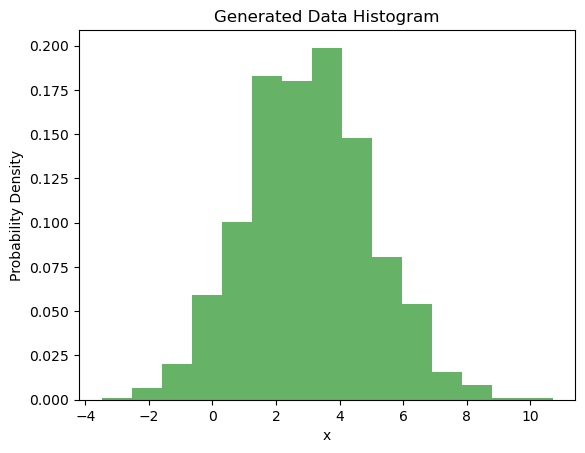

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the true parameters
true_mu = 3.0
true_sigma = 2.0

# Generate data
np.random.seed(42)  # for reproducibility
N = 1000  # number of observations
data = np.random.normal(true_mu, true_sigma, N)

# Plot the generated data
plt.hist(data, bins=15, density=True, alpha=0.6, color='g')
plt.title('Generated Data Histogram')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()


In [23]:
from scipy.stats import norm

# Define the prior distribution for mu
prior_mu = 0.0
prior_sigma = 10.0

# Bayesian inference function
def bayesian_inference(data, prior_mu, prior_sigma, true_sigma):
    N = len(data)
    
    # Prior distribution
    prior = norm(prior_mu, prior_sigma)
    
    # Likelihood function
    likelihood = norm(np.mean(data), true_sigma / np.sqrt(N))
    
    # Posterior distribution
    posterior_mu = (prior_mu / prior_sigma**2 + np.sum(data) / true_sigma**2) / (1 / prior_sigma**2 + N / true_sigma**2)
    posterior_sigma = 1 / np.sqrt(1 / prior_sigma**2 + N / true_sigma**2)
    
    return posterior_mu, posterior_sigma

# Perform Bayesian inference for different N values
N_values = [100,500,750,1000,1500]
for N in N_values:
    posterior_mu, posterior_sigma = bayesian_inference(data[:N], prior_mu, prior_sigma, true_sigma)
    print(f'For N={N}, Bayesian Posterior Mean: {posterior_mu:.4f}, Posterior Standard Deviation: {posterior_sigma:.4f}')

# Maximum Likelihood Estimate for mu
mu_ML = np.mean(data)
print(f'Maximum Likelihood Estimate (mu_ML): {mu_ML:.4f}')


For N=100, Bayesian Posterior Mean: 2.7912, Posterior Standard Deviation: 0.2000
For N=500, Bayesian Posterior Mean: 3.0134, Posterior Standard Deviation: 0.0894
For N=750, Bayesian Posterior Mean: 2.9641, Posterior Standard Deviation: 0.0730
For N=1000, Bayesian Posterior Mean: 3.0385, Posterior Standard Deviation: 0.0632
For N=1500, Bayesian Posterior Mean: 3.0385, Posterior Standard Deviation: 0.0632
Maximum Likelihood Estimate (mu_ML): 3.0387


In [34]:
from scipy.stats import invgamma

# True known mean
known_mu = 3.0

# Generate data with the known mean
data_known_mu = np.random.normal(known_mu, true_sigma, N)

# Bayesian inference for sigma^2
prior_a = 2
prior_b = 1

# Posterior distribution for sigma^2 (using inverse gamma as a conjugate prior)
posterior_a = prior_a + N / 2
posterior_b = prior_b + np.sum((data_known_mu - known_mu)**2) / 2

# Posterior mean and variance for sigma^2
posterior_mean_sigma2 = posterior_b / (posterior_a - 1)
posterior_var_sigma2 = posterior_b**2 / ((posterior_a - 1)**2 * (posterior_a - 2))

print(f'Inferred Sigma^2: Mean  = {posterior_mean_sigma2:.4f}, Variance = {posterior_var_sigma2:.4f}')


Inferred Sigma^2: Mean  = 4.0636, Variance = 0.0220
